# Random Forest Prediction Model

In [1]:
import joblib
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    precision_recall_curve,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    auc
)

In [2]:
X_master = pd.read_csv('../data/processed/master_features.csv')
tracking = pd.read_csv('../data/processed/tracking_labels.csv')
y = tracking['Churn']

## Select Features for Prediction Model 

In [3]:
ranfor_features = [
    'Gender', 'Education', 'Marital Status', 'Salary',
    'Loyalty Card', 'CLV', 'Enrollment Type',
    'Province',
    'Total Flights', 'Distance',
    'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
    'Activity 1 Month Before', 'Activity 2 Months Before', 'Activity 3 Months Before',
    'Points Most Recent', 'Overall Trend', 'Avg Monthly Points', 'Activity Volatility',
    'Customer Age (Years)']

X = X_master[ranfor_features].copy()

print("=== FEATURES SELECTED ===")
print(f"Total features: {X.columns}")

=== FEATURES SELECTED ===
Total features: Index(['Gender', 'Education', 'Marital Status', 'Salary', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Province', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Activity 1 Month Before', 'Activity 2 Months Before',
       'Activity 3 Months Before', 'Points Most Recent', 'Overall Trend',
       'Avg Monthly Points', 'Activity Volatility', 'Customer Age (Years)'],
      dtype='str')


* We need to encode categorical columns 

In [4]:
categorical_cols = ['Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type', 'Province']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"\nBefore encoding: {X.shape[1]} features")
print(f"After encoding: {X_encoded.shape[1]} features")
print("\nEncoded feature names:")
print(X_encoded.columns.tolist())


Before encoding: 21 features
After encoding: 35 features

Encoded feature names:
['Salary', 'CLV', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed', 'Activity 1 Month Before', 'Activity 2 Months Before', 'Activity 3 Months Before', 'Points Most Recent', 'Overall Trend', 'Avg Monthly Points', 'Activity Volatility', 'Customer Age (Years)', 'Gender_Male', 'Education_College', 'Education_Doctor', 'Education_High School or Below', 'Education_Master', 'Marital Status_Married', 'Marital Status_Single', 'Loyalty Card_Nova', 'Loyalty Card_Star', 'Enrollment Type_Standard', 'Province_British Columbia', 'Province_Manitoba', 'Province_New Brunswick', 'Province_Newfoundland', 'Province_Nova Scotia', 'Province_Ontario', 'Province_Prince Edward Island', 'Province_Quebec', 'Province_Saskatchewan', 'Province_Yukon']


### Splitting dataset into a training set and testing set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42,stratify=y)

print("=== TRAIN/TEST SPLIT ===")
print(f"Training set: {X_train.shape[0]} samples (80%)")
print(f"Test set: {X_test.shape[0]} samples (20%)")
print(f"\nTrain churn rate: {y_train.mean():.2%}")
print(f"Test churn rate: {y_test.mean():.2%}")

=== TRAIN/TEST SPLIT ===
Training set: 12140 samples (80%)
Test set: 3036 samples (20%)

Train churn rate: 12.07%
Test churn rate: 12.06%


## Training Model 

In [6]:
rf_model = RandomForestClassifier(
    n_estimators=100,           # Number of trees
    max_depth=10,               # Maximum depth of trees
    min_samples_split=20,       # Minimum samples to split a node
    min_samples_leaf=10,        # Minimum samples in a leaf
    class_weight='balanced',    # Handle class imbalance
    random_state=42,            # For reproducibility
    n_jobs=-1,                  # Use all CPU cores
    verbose=1                   # Show progress
)
print("Training model...")
rf_model.fit(X_train, y_train)

print("\n Model training complete!")

Training model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.1s



 Model training complete!


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


#### Run Predictions 

In [7]:
# Predict on training set
y_train_pred = rf_model.predict(X_train)
y_train_proba = rf_model.predict_proba(X_train)[:, 1]  # Probability of churn

# Predict on test set
y_test_pred = rf_model.predict(X_test)
y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of churn

print(" Predictions complete!")
print(f"Train predictions: {len(y_train_pred)}")
print(f"Test predictions: {len(y_test_pred)}")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


 Predictions complete!
Train predictions: 12140
Test predictions: 3036


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


#### Evaluating Model Performance 

In [8]:
# Training set performance
print("\n--- TRAINING SET PERFORMANCE ---")
print(f"Accuracy:  {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Recall:    {recall_score(y_train, y_train_pred):.4f}")
print(f"F1-Score:  {f1_score(y_train, y_train_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_train, y_train_proba):.4f}")

# Test set performance
print("\n--- TEST SET PERFORMANCE ---")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_test_proba):.4f}")




--- TRAINING SET PERFORMANCE ---
Accuracy:  0.9114
Precision: 0.6061
Recall:    0.7604
F1-Score:  0.6745
ROC-AUC:   0.9450

--- TEST SET PERFORMANCE ---
Accuracy:  0.8758
Precision: 0.4873
Recall:    0.5765
F1-Score:  0.5282
ROC-AUC:   0.8345


* Model has good accuracy, but low recall 
* Training recall is 0.76 vs test recall of 0.57. This is an indication of overfitting 

### Retraining Model with Adjusted Parameters

In [9]:
rf_model_v2 = RandomForestClassifier(
    n_estimators=150,          # More trees for stability (was 100)
    max_depth=8,               # Shallower trees (was 10)
    min_samples_split=40,      # Require more samples to split (was 20)
    min_samples_leaf=20,       # Larger leaf nodes (was 10)
    max_features='sqrt',       # Limit features per split (NEW)
    class_weight='balanced',   # Keep this
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Training new model...")
rf_model_v2.fit(X_train, y_train)

# Predict
y_train_pred_v2 = rf_model_v2.predict(X_train)
y_train_proba_v2 = rf_model_v2.predict_proba(X_train)[:, 1]
y_test_pred_v2 = rf_model_v2.predict(X_test)
y_test_proba_v2 = rf_model_v2.predict_proba(X_test)[:, 1]


Training new model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_

### Comparing Models to Evaluate Improvement 

In [10]:
# Original Model (v1)
print("\n--- MODEL V1 (Original) ---")
print(f"Training Recall:  {recall_score(y_train, y_train_pred):.4f}")
print(f"Test Recall:      {recall_score(y_test, y_test_pred):.4f}")
print(f"Gap:              {recall_score(y_train, y_train_pred) - recall_score(y_test, y_test_pred):.4f}")
print(f"\nTest Precision:   {precision_score(y_test, y_test_pred):.4f}")
print(f"Test F1:          {f1_score(y_test, y_test_pred):.4f}")
print(f"Test ROC-AUC:     {roc_auc_score(y_test, y_test_proba):.4f}")

# New Model (v2)
print("\n--- MODEL V2 (Reduced Overfitting) ---")
print(f"Training Recall:  {recall_score(y_train, y_train_pred_v2):.4f}")
print(f"Test Recall:      {recall_score(y_test, y_test_pred_v2):.4f}")
print(f"Gap:              {recall_score(y_train, y_train_pred_v2) - recall_score(y_test, y_test_pred_v2):.4f}")
print(f"\nTest Precision:   {precision_score(y_test, y_test_pred_v2):.4f}")
print(f"Test F1:          {f1_score(y_test, y_test_pred_v2):.4f}")
print(f"Test ROC-AUC:     {roc_auc_score(y_test, y_test_proba_v2):.4f}")

print("\n--- IMPROVEMENT ---")
recall_improvement = recall_score(y_test, y_test_pred_v2) - recall_score(y_test, y_test_pred)
print(f"Test Recall Change: {recall_improvement:+.4f} ({recall_improvement*100:+.2f}%)")



--- MODEL V1 (Original) ---
Training Recall:  0.7604
Test Recall:      0.5765
Gap:              0.1839

Test Precision:   0.4873
Test F1:          0.5282
Test ROC-AUC:     0.8345

--- MODEL V2 (Reduced Overfitting) ---
Training Recall:  0.7140
Test Recall:      0.6339
Gap:              0.0801

Test Precision:   0.4361
Test F1:          0.5167
Test ROC-AUC:     0.8346

--- IMPROVEMENT ---
Test Recall Change: +0.0574 (+5.74%)


* Recall has improved
* Gap between training recall and test recall has decreased 

### Optimize Threshold Number for Better Predictions

In [11]:
# Test a range of thresholds
thresholds_to_test = np.arange(0.20, 0.55, 0.05)

print("\nThreshold | Recall | Precision | F1-Score | Churners Caught | Customers Flagged | False Alarms")
print("-" * 105)

results = []

for threshold in thresholds_to_test:
    y_pred_thresh = (y_test_proba_v2 >= threshold).astype(int)

    recall = recall_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    cm = confusion_matrix(y_test, y_pred_thresh)
    tn, fp, fn, tp = cm.ravel()

    churners_caught = tp
    flagged = tp + fp
    false_alarms = fp

    results.append({
        'threshold': threshold,
        'recall': recall,
        'precision': precision,
        'f1': f1,
        'caught': churners_caught,
        'flagged': flagged,
        'false_alarms': false_alarms
    })

    print(f"{threshold:9.2f} | {recall:6.2%} | {precision:9.2%} | {f1:8.2%} | "
          f"{churners_caught:15d} | {flagged:17d} | {false_alarms:12d}")


Threshold | Recall | Precision | F1-Score | Churners Caught | Customers Flagged | False Alarms
---------------------------------------------------------------------------------------------------------
     0.20 | 96.99% |    15.09% |   26.12% |             355 |              2352 |         1997
     0.25 | 93.72% |    17.36% |   29.29% |             343 |              1976 |         1633
     0.30 | 88.52% |    19.98% |   32.60% |             324 |              1622 |         1298
     0.35 | 81.15% |    22.81% |   35.61% |             297 |              1302 |         1005
     0.40 | 73.77% |    28.07% |   40.66% |             270 |               962 |          692
     0.45 | 67.76% |    34.49% |   45.71% |             248 |               719 |          471
     0.50 | 63.39% |    43.61% |   51.67% |             232 |               532 |          300


### Optimize Threshold Number for Better Predictions

* Based on metrics and business needs, the threshold of 0.35 is optimal 

In [12]:
optimal_threshold_v2 = 0.35
y_test_pred_final = (y_test_proba_v2 >= optimal_threshold_v2).astype(int)

# Evaluate
print(f"\nModel V2 + Threshold {optimal_threshold_v2}:")
print(f"Precision: {precision_score(y_test, y_test_pred_final):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred_final):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred_final):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_test_proba_v2):.4f}")

# Confusion matrix
cm_final = confusion_matrix(y_test, y_test_pred_final)
tn, fp, fn, tp = cm_final.ravel()

print("\n--- FINAL RESULTS ---")
print(f"Churners caught: {tp} out of 366 ({tp/366*100:.1f}%)")
print(f"Churners missed: {fn} ({fn/366*100:.1f}%)")
print(f"Customers flagged: {tp + fp}")
print(f"False alarms: {fp}")


Model V2 + Threshold 0.35:
Precision: 0.2281
Recall:    0.8115
F1-Score:  0.3561
ROC-AUC:   0.8346

--- FINAL RESULTS ---
Churners caught: 297 out of 366 (81.1%)
Churners missed: 69 (18.9%)
Customers flagged: 1302
False alarms: 1005


* We are able to catch 81% of churners 
* False alarms are okay based on business need 

## Visualization of Model

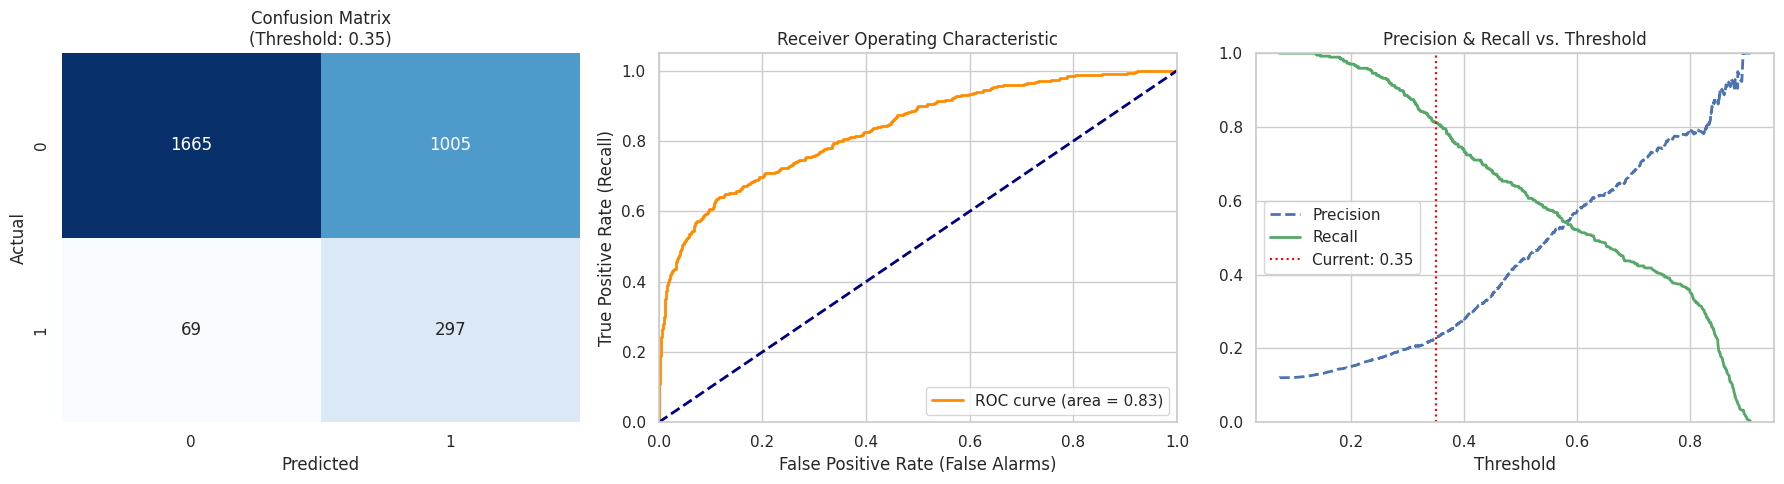

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 5))

# --- 1. Confusion Matrix Plot ---
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_test_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix\n(Threshold: {optimal_threshold_v2})')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# --- 2. ROC Curve ---
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_test_proba_v2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# --- 3. Precision-Recall vs Threshold ---
plt.subplot(1, 3, 3)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_proba_v2)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", lw=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", lw=2)
plt.axvline(optimal_threshold_v2, color="red", linestyle=":", label=f"Current: {optimal_threshold_v2}")
plt.xlabel("Threshold")
plt.title("Precision & Recall vs. Threshold")
plt.legend(loc="best")
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

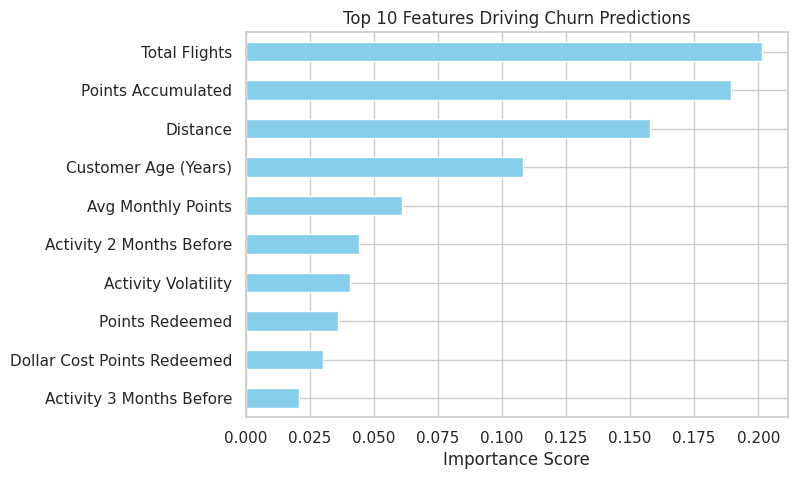

In [14]:
importances = rf_model_v2.feature_importances_
feature_names = X_train.columns # Assuming X_train is a DataFrame
rf_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(7, 5))
rf_importances.tail(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Features Driving Churn Predictions')
plt.xlabel('Importance Score')
plt.show()

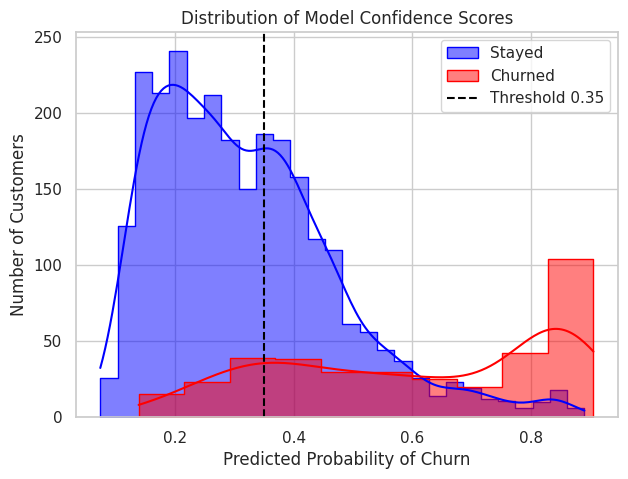

In [15]:
plt.figure(figsize=(7, 5))
sns.histplot(data=y_test_proba_v2[y_test == 0], color="blue", label="Stayed", kde=True, element="step")
sns.histplot(data=y_test_proba_v2[y_test == 1], color="red", label="Churned", kde=True, element="step")
plt.axvline(optimal_threshold_v2, color='black', linestyle='--', label=f'Threshold {optimal_threshold_v2}')
plt.title('Distribution of Model Confidence Scores')
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

### Export Model for Prediction in Production 

In [16]:
joblib.dump(rf_model_v2, '../models/churn_model.pkl')

['../models/churn_model.pkl']